Import and Install libraries

In [1]:
!pip install keras matplotlib tensorflow

In [17]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt


Normalize

In [18]:
(x_train , y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

To_categorical

In [19]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Model Creation

In [25]:
model_3 = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(1024, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

Run Model and Compile

In [26]:
model_3.compile(optimizer=Adam(learning_rate=0.0003),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
result = model_3.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.1966 - loss: 2.1201 - val_accuracy: 0.3069 - val_loss: 1.9343
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.2941 - loss: 1.9245 - val_accuracy: 0.3431 - val_loss: 1.8292
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.3292 - loss: 1.8486 - val_accuracy: 0.3634 - val_loss: 1.7626
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.3545 - loss: 1.7952 - val_accuracy: 0.3849 - val_loss: 1.7159
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.3657 - loss: 1.7568 - val_accuracy: 0.3957 - val_loss: 1.6813
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.3816 - loss: 1.7215 - val_accuracy: 0.4113 - val_loss: 1.6424
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.3952 - loss: 1.6851 - val_accuracy: 0.4137 - val_loss: 1.6469
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.4069 - loss: 1.6584 - 

Test and Prediction

In [27]:
(loss , accuracy) = model_3.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.02f}")
print(f"Test Accuracy: {accuracy*100:.02f}%")
print(result.history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5125 - loss: 1.3705
Test Loss: 1.37
Test Accuracy: 51.25%
{'accuracy': [0.19657500088214874, 0.29409998655319214, 0.32922500371932983, 0.35452499985694885, 0.3656750023365021, 0.3816249966621399, 0.3952000141143799, 0.40689998865127563, 0.4126250147819519, 0.42342498898506165, 0.4281499981880188, 0.43552500009536743, 0.44279998540878296, 0.443574994802475, 0.4485499858856201, 0.45864999294281006, 0.46297499537467957, 0.4623500108718872, 0.46619999408721924, 0.47417500615119934, 0.47929999232292175, 0.47962498664855957, 0.48497501015663147, 0.4879249930381775, 0.4933750033378601, 0.49572500586509705, 0.49607500433921814, 0.4988250136375427, 0.5037500262260437, 0.5065249800682068, 0.5110250115394592, 0.5118250250816345, 0.5169000029563904, 0.5184749960899353, 0.521049976348877, 0.5235499739646912, 0.5248749852180481, 0.526075005531311, 0.5276749730110168, 0.5321499705314636, 0.533424973487854, 0.5364000201225281, 0.5377500057220459, 

PLOT

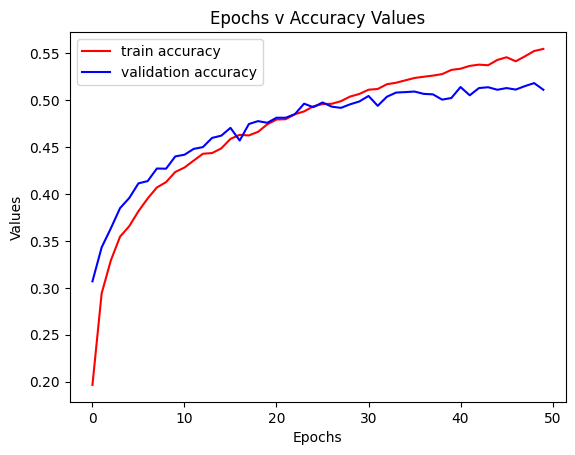

In [28]:
plt.plot(result.history['accuracy'], label='train accuracy', color='red')
plt.plot(result.history['val_accuracy'], label='validation accuracy', color='blue')
plt.title('Epochs v Accuracy Values')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.legend()
plt.show()

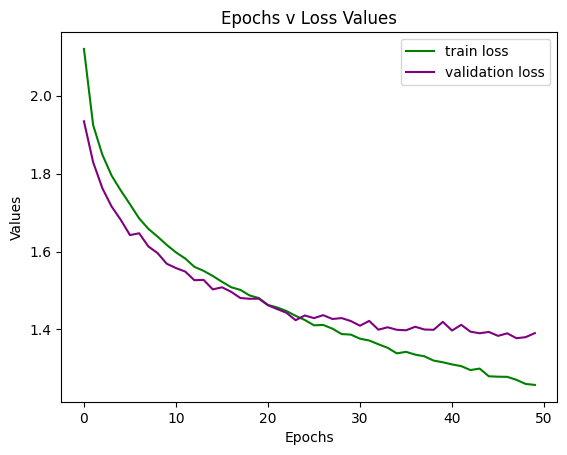

In [29]:
plt.plot(result.history['loss'], label='train loss', color='green')
plt.plot(result.history['val_loss'], label='validation loss', color='purple')
plt.title('Epochs v Loss Values')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.legend()
plt.show()